## Filter ERA5 just for station locations

In [7]:
import xarray as xr
import numpy as np

In [63]:
# GESLA dataset
file_path = "/Users/lb962/Downloads/ESL/GESLA/data/processed/GESLA/interim/GESLA3_NorthSeaShort.nc"
# Open the dataset
GESLA_ns_dataset = xr.open_dataset(file_path)
GESLA_ns_dataset = GESLA_ns_dataset[["sea_level", "latitude", "longitude"]]

In [67]:
import pandas as pd

# Filter dataset for the time range from 1990 to 2014
start_date = pd.Timestamp('1990-01-01')
end_date = pd.Timestamp('2014-12-31')
filtered_ds = GESLA_ns_dataset.sel(date_time=slice(start_date, end_date))

sea_level = filtered_ds["sea_level"]

# Set sea level values to NaN where they are below -1 or above 15
sea_level_filtered = sea_level.where((sea_level > -1) & (sea_level < 15), np.nan)
filtered_ds["q_sea_level"] = sea_level_filtered

# Calculate the total possible observations for each station
total_possible_observations = len(filtered_ds['date_time'])

# Calculate the count of non-NaN values for each station
station_count = filtered_ds.count(dim='date_time')

# Calculate the percentage of available data for each station
percentage_available_data = station_count / total_possible_observations * 100

# Filter out stations where the percentage of available data is less than 50%
filtered_ds = filtered_ds.where(percentage_available_data >= 30, drop=True)

In [79]:
import pandas as pd
import numpy as np

# Filter dataset for the time range from 1990 to 2014
start_date = pd.Timestamp('1990-01-01')
end_date = pd.Timestamp('2014-12-31')
filtered_ds = GESLA_ns_dataset.sel(date_time=slice(start_date, end_date))

# Extract latitude and longitude before filtering
latitude = filtered_ds['latitude']
longitude = filtered_ds['longitude']

sea_level = filtered_ds["sea_level"]

# Set sea level values to NaN where they are below -1 or above 15
sea_level_filtered = sea_level.where((sea_level > -1) & (sea_level < 15), np.nan)
filtered_ds["q_sea_level"] = sea_level_filtered

# Calculate the total possible observations for each station
total_possible_observations = len(filtered_ds['date_time'])

# Calculate the count of non-NaN values for each station
station_count = filtered_ds.count(dim='date_time')

# Calculate the percentage of available data for each station
percentage_available_data = station_count / total_possible_observations * 100

# Filter out stations where the percentage of available data is less than 50%
filtered_ds = filtered_ds.where(percentage_available_data >= 30, drop=True)

# Plot latitude and longitude of the unique stations
import matplotlib.pyplot as plt

# Extract latitude and longitude of unique stations
unique_stations = filtered_ds['station'].values
latitude = latitude.sel(station=unique_stations).values
longitude = longitude.sel(station=unique_stations).values


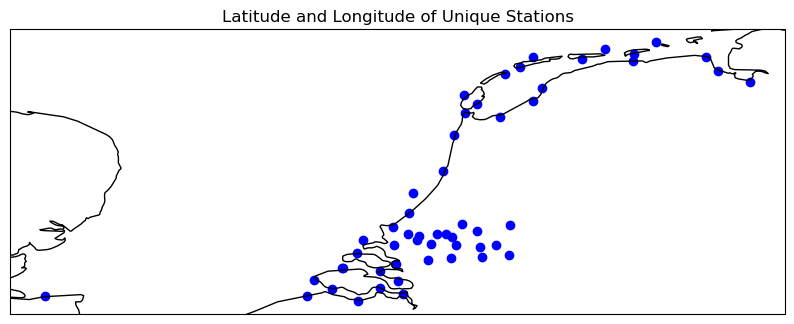

In [80]:
import cartopy.crs as ccrs

# Plot latitude and longitude of the unique stations using Cartopy
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot latitude and longitude
ax.scatter(longitude, latitude, marker='o', color='b', transform=ccrs.PlateCarree())

# Add coastlines for reference
ax.coastlines()

# Set titles and labels
plt.title('Latitude and Longitude of Unique Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [83]:
filtered_ds.station

<xarray.DataArray 'station' (station: 54)>
array([ 48,  68,  69,  70,  72,  73,  74,  75,  76,  78,  79,  80,  81,  82,
        83,  84,  86,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 110, 113, 115, 116, 117, 119,
       120, 121, 122, 123, 124, 130, 131, 133, 134, 135, 136, 139])
Coordinates:
  * station  (station) int64 48 68 69 70 72 73 74 ... 131 133 134 135 136 139

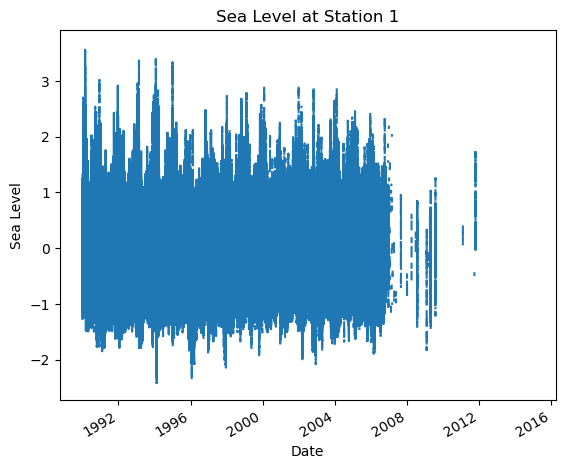

In [90]:
# Assuming 'ds' is an xarray Dataset
sea_level_station1 = filtered_ds.sel(station=74)
# Plotting
sea_level_station1.sea_level.plot()
plt.title('Sea Level at Station 1')
plt.xlabel('Date')
plt.ylabel('Sea Level')
plt.show()

# Find out location of all stations

In [96]:
unique_stations

array([ 48,  68,  69,  70,  72,  73,  74,  75,  76,  78,  79,  80,  81,
        82,  83,  84,  86,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 110, 113, 115,
       116, 117, 119, 120, 121, 122, 123, 124, 130, 131, 133, 134, 135,
       136, 139])

In [97]:
# Create an empty dictionary to store station coordinates
station_coordinates = {}

# Iterate over each station number in unique_stations
for station_number in unique_stations:
    # Get the latitude and longitude coordinates for the current station number
    station_data = GESLA_ns_dataset.sel(station=station_number)
    latitude = station_data.latitude.values.item()
    longitude = station_data.longitude.values.item()
    
    # Store the coordinates in the dictionary
    station_coordinates[station_number] = {'latitude': latitude, 'longitude': longitude}

# Print the dictionary
print(station_coordinates)


{48: {'latitude': 51.38198, 'longitude': 1.11553}, 68: {'latitude': 53.326353, 'longitude': 6.933123}, 69: {'latitude': 51.735846, 'longitude': 5.124738}, 70: {'latitude': 51.442308, 'longitude': 3.596057}, 72: {'latitude': 53.363043, 'longitude': 5.220026}, 73: {'latitude': 51.977572, 'longitude': 4.119881}, 74: {'latitude': 53.06986, 'longitude': 5.33663}, 75: {'latitude': 52.964357, 'longitude': 4.74499}, 76: {'latitude': 51.819721, 'longitude': 4.128239}, 78: {'latitude': 53.175632, 'longitude': 5.409342}, 79: {'latitude': 51.445556, 'longitude': 4.006959}, 80: {'latitude': 51.920018, 'longitude': 4.499762}, 81: {'latitude': 51.336209, 'longitude': 3.819812}, 82: {'latitude': 51.819523, 'longitude': 4.670715}, 83: {'latitude': 53.296125, 'longitude': 5.091456}, 84: {'latitude': 52.099033, 'longitude': 4.263563}, 86: {'latitude': 52.931535, 'longitude': 5.045596}, 88: {'latitude': 51.943089, 'longitude': 4.851271}, 89: {'latitude': 51.806039, 'longitude': 4.876825}, 90: {'latitude':

In [98]:
import numpy as np

# Create an empty dictionary to store station coordinates
station_coordinates = {}

# Create empty lists to store latitude and longitude pairs
coordinates_exact = []
coordinates_rounded = []

# Iterate over each station number in unique_stations
for station_number in unique_stations:
    # Get the latitude and longitude coordinates for the current station number
    station_data = GESLA_ns_dataset.sel(station=station_number)
    latitude = station_data.latitude.values.item()
    longitude = station_data.longitude.values.item()
    
    # Store the coordinates in the dictionary
    station_coordinates[station_number] = {'latitude': latitude, 'longitude': longitude}
    
    # Store exact coordinates in the list
    coordinates_exact.append((latitude, longitude))
    
    # Round coordinates to the nearest 0.25
    latitude_rounded = round(latitude / 0.25) * 0.25
    longitude_rounded = round(longitude / 0.25) * 0.25
    
    # Store rounded coordinates in the list
    coordinates_rounded.append((latitude_rounded, longitude_rounded))

# Print the dictionary
print("Station Coordinates Dictionary:")
print(station_coordinates)
print()

# Print the lists
print("Exact Coordinates for Each Station:")
print(coordinates_exact)
print("\nRounded Coordinates for Each Station:")
print(coordinates_rounded)


Station Coordinates Dictionary:
{48: {'latitude': 51.38198, 'longitude': 1.11553}, 68: {'latitude': 53.326353, 'longitude': 6.933123}, 69: {'latitude': 51.735846, 'longitude': 5.124738}, 70: {'latitude': 51.442308, 'longitude': 3.596057}, 72: {'latitude': 53.363043, 'longitude': 5.220026}, 73: {'latitude': 51.977572, 'longitude': 4.119881}, 74: {'latitude': 53.06986, 'longitude': 5.33663}, 75: {'latitude': 52.964357, 'longitude': 4.74499}, 76: {'latitude': 51.819721, 'longitude': 4.128239}, 78: {'latitude': 53.175632, 'longitude': 5.409342}, 79: {'latitude': 51.445556, 'longitude': 4.006959}, 80: {'latitude': 51.920018, 'longitude': 4.499762}, 81: {'latitude': 51.336209, 'longitude': 3.819812}, 82: {'latitude': 51.819523, 'longitude': 4.670715}, 83: {'latitude': 53.296125, 'longitude': 5.091456}, 84: {'latitude': 52.099033, 'longitude': 4.263563}, 86: {'latitude': 52.931535, 'longitude': 5.045596}, 88: {'latitude': 51.943089, 'longitude': 4.851271}, 89: {'latitude': 51.806039, 'longitu

# Open ERA5

In [3]:
import os
import xarray as xr
import matplotlib.pyplot as plt

# Define the path to the folder containing the NetCDF files
folder_path = '/Users/lb962/Downloads/ESL/GESLA/data/ERA5hourly'

# Get a list of all NetCDF files in the folder
nc_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.nc')]

# Open all NetCDF files as a single xarray Dataset
ERA5_dataset = xr.open_mfdataset(nc_files)

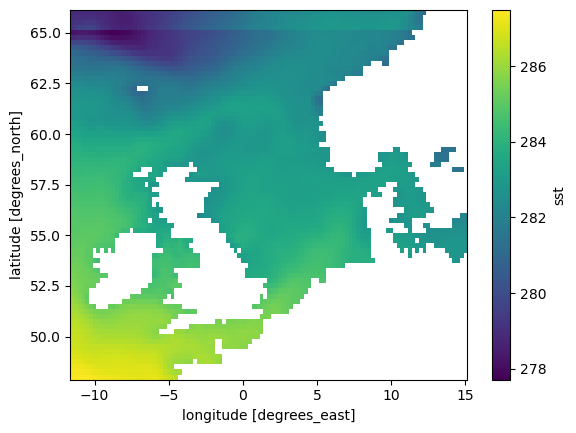

In [4]:
# Select the data variable
data_var = ERA5_dataset['sst']

# Compute the mean along the time dimension
data_mean = data_var.mean(dim='time').compute()

# Plot the data
data_mean.plot()

# Show the plot
plt.show()

## Closest stuff

In [150]:
import numpy as np
from scipy.spatial.distance import cdist

# Assuming 'ERA5_dataset' is your xarray Dataset containing latitude and longitude variables
# Assuming 'coordinates_rounded' is your list of rounded latitude and longitude coordinates

# Extract the data variable
data_var = ERA5_dataset['mdts']

# Extract latitude and longitude variables from the data variable
latitude = data_var.latitude.values
longitude = data_var.longitude.values

# Determine the shape of the data variable
data_shape = data_var.shape

# Reshape latitude and longitude arrays to match the data variable shape
reshaped_latitude = np.broadcast_to(latitude[:, np.newaxis], data_shape[1:])
reshaped_longitude = np.broadcast_to(longitude[np.newaxis, :], data_shape[1:])

# Create a grid of latitude and longitude coordinates
grid_points = np.column_stack((reshaped_latitude.ravel(), reshaped_longitude.ravel()))

# Convert coordinates_rounded list to numpy array
coordinates_rounded_arr = np.array(coordinates_rounded)

# Calculate distances between each grid point and each rounded coordinate
distances = cdist(grid_points, coordinates_rounded_arr)

# Find the indices of the closest grid points for each rounded coordinate
closest_indices = np.argmin(distances, axis=0)

# Extract latitude and longitude of the closest grid points
closest_latitude = grid_points[closest_indices, 0]
closest_longitude = grid_points[closest_indices, 1]

# Print the results
for i, (lat, lon) in enumerate(coordinates_rounded):
    if lat != closest_latitude[i] or lon != closest_longitude[i]:
        print(f"Oh noo! Closest grid point to coordinates {lat}, {lon} is at latitude {closest_latitude[i]} and longitude {closest_longitude[i]}")
   # else:
        #print(f"Closest grid point to coordinates {lat}, {lon} is at latitude {closest_latitude[i]} and longitude {closest_longitude[i]}")


In [220]:
# Create an empty dictionary to store datasets for each station
station_datasets = {}

# Loop through each station in filtered_ds
for station in filtered_ds['station'].values:
    # Filter data for the current station
    station_data = filtered_ds.sel(station=station)
    
    # Store the filtered dataset for the current station in the dictionary
    station_datasets[station] = station_data


In [221]:
# Create an empty dictionary to store datasets for each station
ERA5_datasets = {}

# Loop through each station and its coordinates in station_coordinates
for station, coordinates in station_coordinates.items():
    # Extract latitude and longitude for the current station
    latitude, longitude = coordinates['latitude'], coordinates['longitude']
    
    # Extract the dataset for the corresponding latitude and longitude from ERA5_dataset
    station_dataset = ERA5_dataset.sel(latitude=latitude, longitude=longitude, method='nearest')
    
    # Store the dataset for the current station in the dictionary
    ERA5_datasets[station] = station_dataset

In [244]:
merged_land_data = []
for i in station_datasets.keys():
    print(i)
    station_station = station_datasets[i].rename({'date_time': 'time'})
    station_i = station_station.to_dataframe().reset_index()
    station_i = station_i[["q_sea_level", "station", "time"]].dropna()

    ERA5_station = ERA5_datasets[i].squeeze().drop(["latitude", "longitude"])
    ERA5_i = ERA5_station.to_dataframe().reset_index()

    # Merge the two DataFrames based on the 'key' column
    merged_df = pd.merge(ERA5_i[["u10", "v10", "sst", "sp", "time"]].dropna(), station_i, on='time', how='inner')
    merged_land_data.append(merged_df)

48
68
69
70
72
73
74
75
76
78
79
80
81
82
83
84
86
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
110
113
115
116
117
119
120
121
122
123
124
130
131
133
134
135
136
139


In [318]:
trial = merged_land_data

In [319]:
# Iterate through the list of DataFrames, skipping the first one (i = 0)
for i, df in enumerate(trial):
    if i != 0:  # Skip the first DataFrame
        # Check if the DataFrame is non-empty
        if not df.empty:
            # Get the station number from the DataFrame
            station_number = df['station'].iloc[0]  # Assuming 'station' is the column containing the station number
            
            # Rename the columns dynamically
            columns_to_rename = {col: f"{col}_{station_number}" for col in df.columns if col != 'time'}
            df.rename(columns=columns_to_rename, inplace=True)
            
            # Update the DataFrame in the list
            trial[i] = df.reset_index().dropna()

KeyError: 'station'

In [265]:
# Iterate through the list of DataFrames
for i, df in enumerate(trial):
    # Check if the DataFrame is non-empty
    if not df.empty:
        # Get the station number from the DataFrame
        station_number = df['station'].iloc[0]  # Assuming 'station' is the column containing the station number
        
        # Rename the columns dynamically
        columns_to_rename = {col: f"{col}_{station_number}" for col in df.columns if col != 'time'}
        df.rename(columns=columns_to_rename, inplace=True)
        
        # Update the DataFrame in the list
        trial[i] = df

KeyError: 'station'

In [328]:
import pandas as pd

# Initialize a list to store station numbers and DataFrame sizes
station_sizes = []

# Iterate through the list of DataFrames
for df in trial:
    # Check if the DataFrame is not empty
    if not df.empty:
        # Get the size of the DataFrame
        size = df.shape[0]  # Assuming you want to get the number of rows in the DataFrame
        
        # Extract station number from the column name
        station_column = df.columns[df.columns.str.startswith('station_')]
        if len(station_column) > 0:
            station_number = int(station_column[0].split('_')[-1])
            
            # Append the station number and size to the list
            station_sizes.append({'Station': station_number, 'Size': size})

# Create a DataFrame from the list of station numbers and sizes
station_sizes_df = pd.DataFrame(station_sizes)

# Print the DataFrame
print(station_sizes_df)

    Station    Size
0        48  145604
1        72  201151
2        73  217263
3        74  207126
4        75  211319
5        78  202815
6        83  200509
7        86  214499
8        98  182904
9        99  213004
10      100  190570
11      101  182028
12      110  182959
13      116  175730
14      119  189960
15      120  189215
16      122  215364
17      124  196966
18      134  192012
19      136  197823
20      139  142558


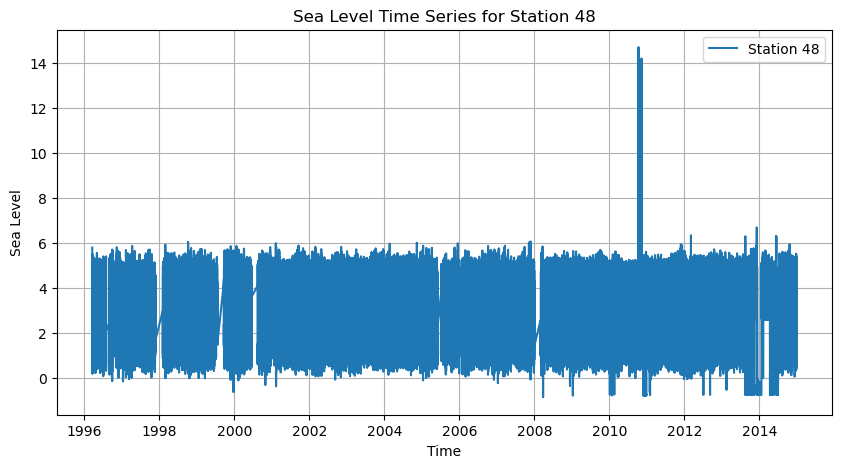

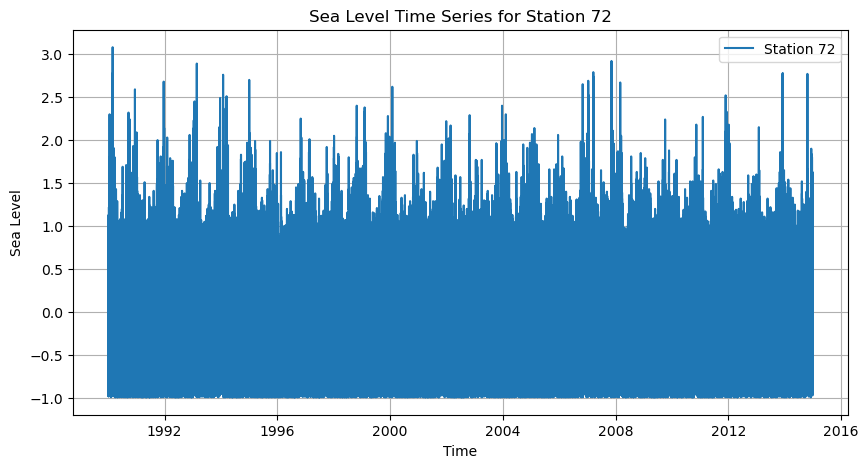

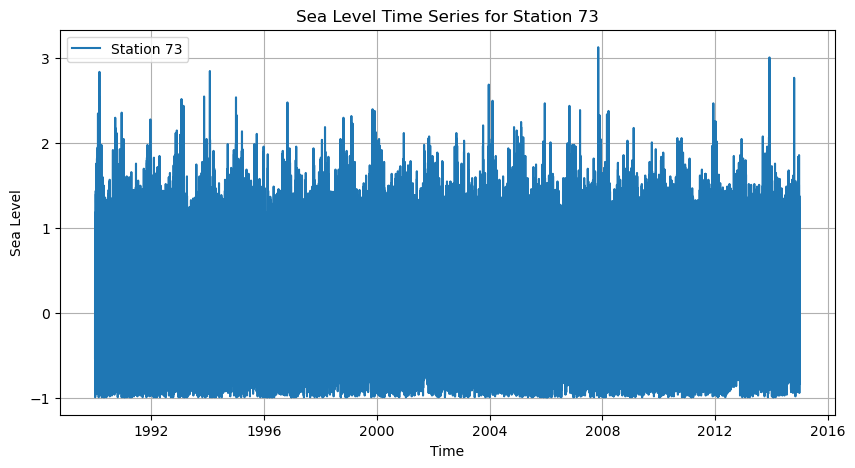

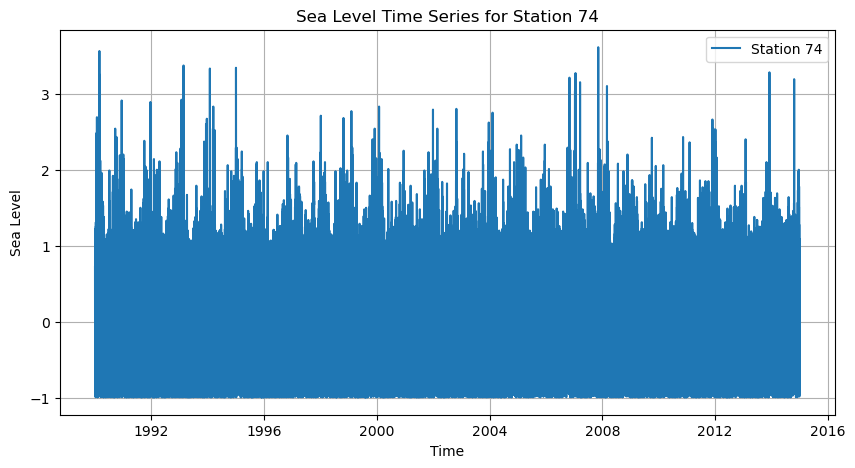

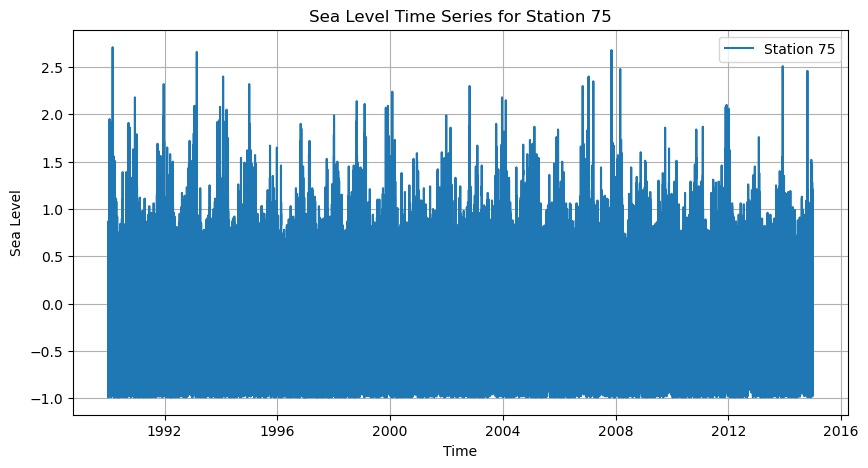

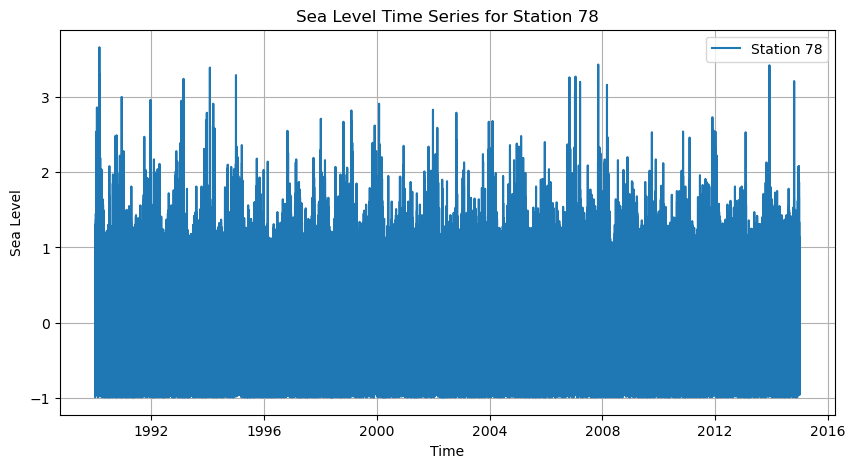

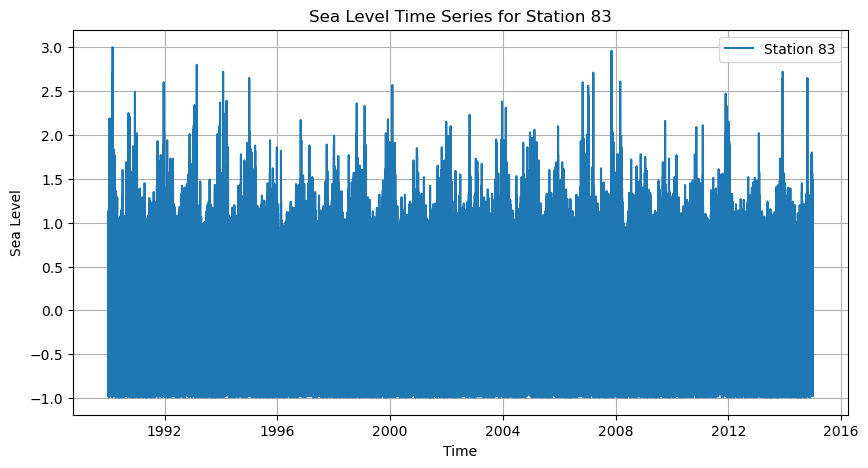

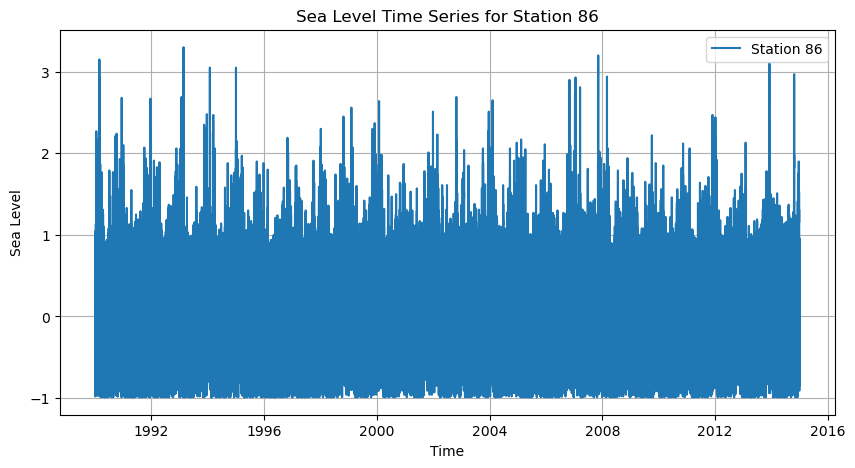

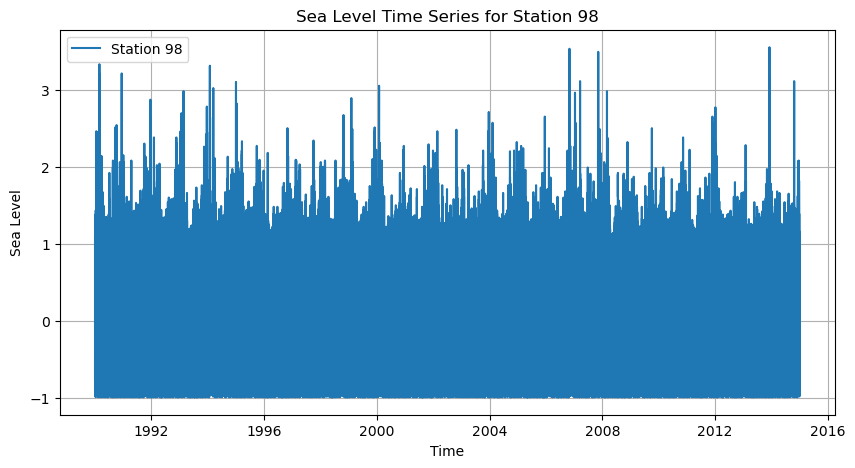

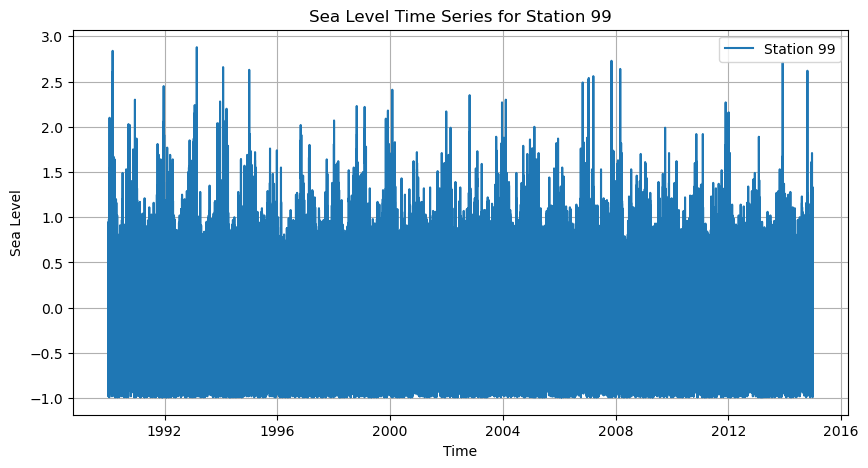

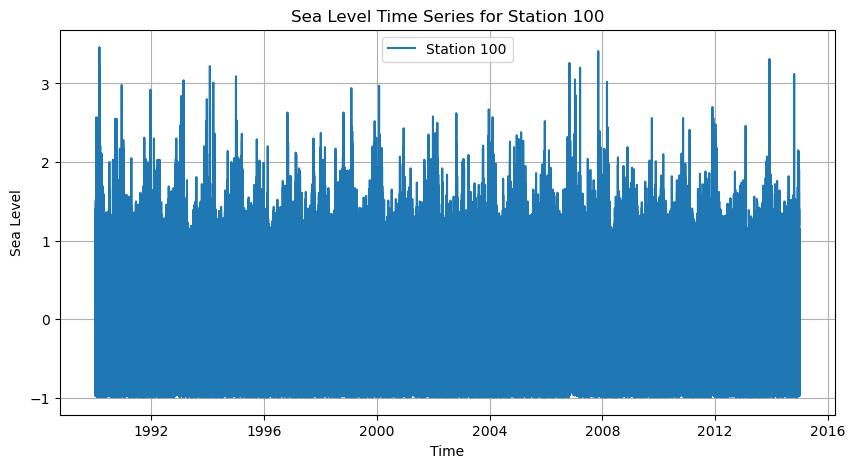

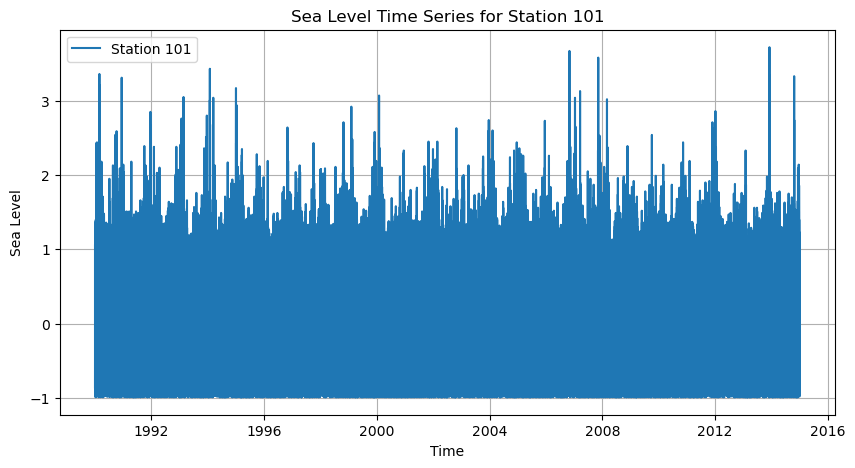

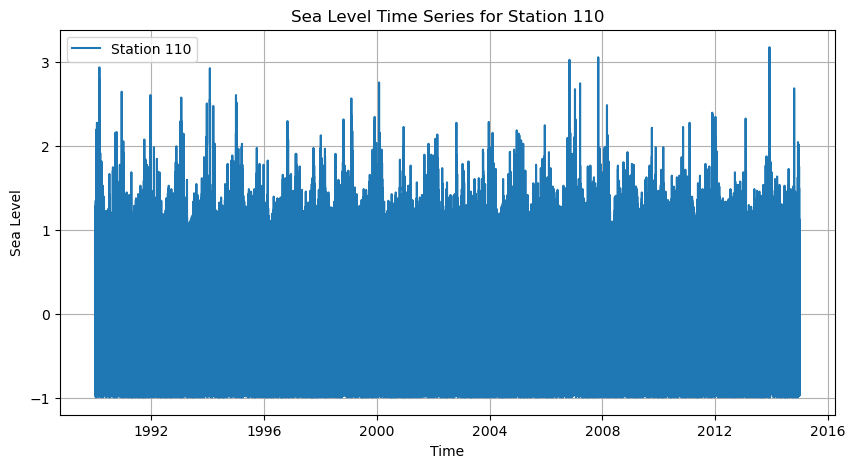

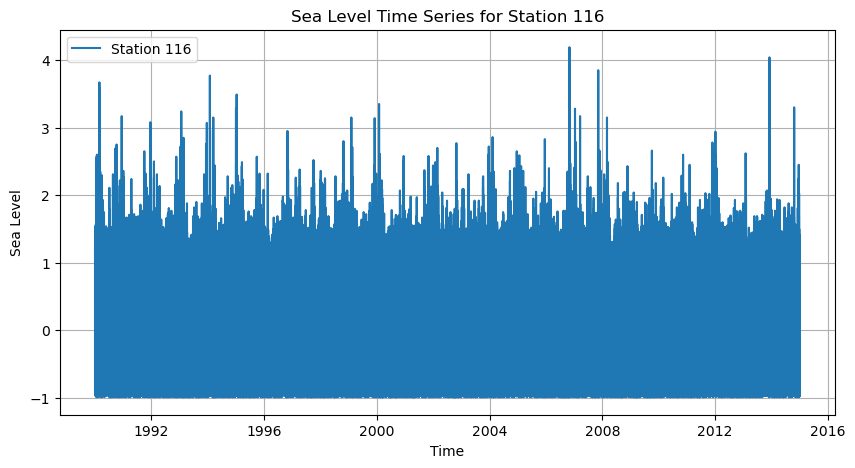

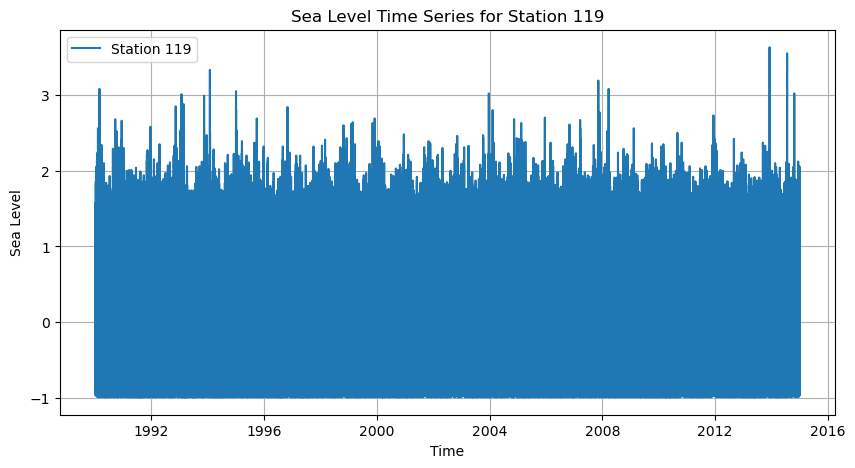

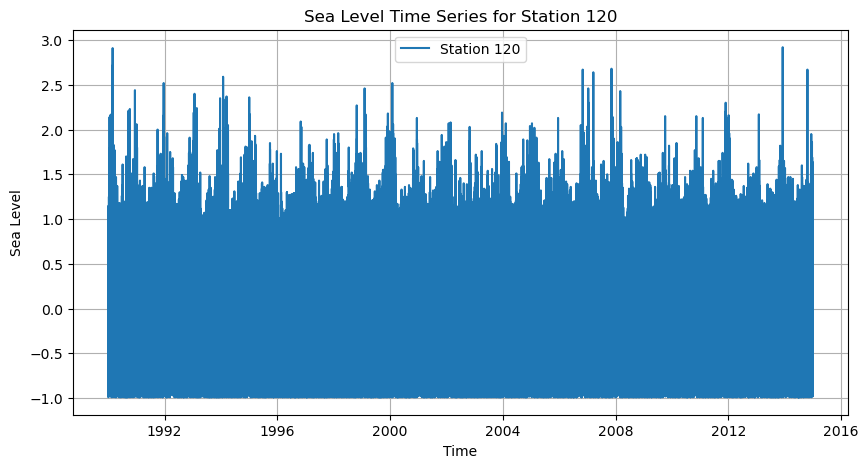

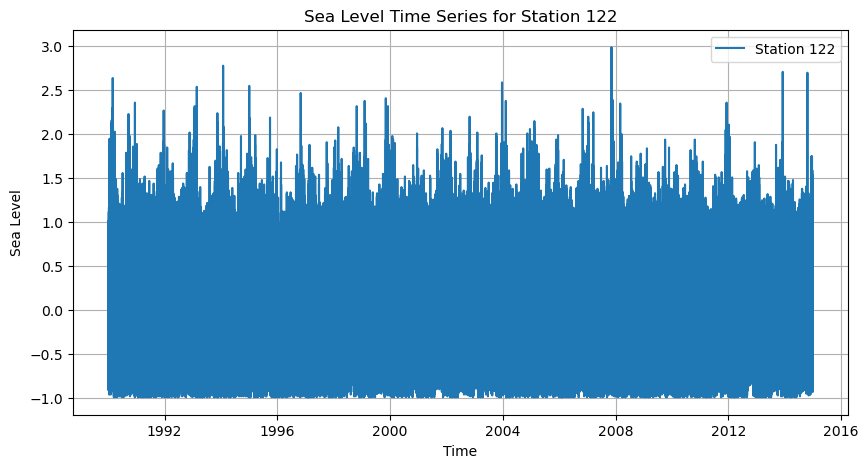

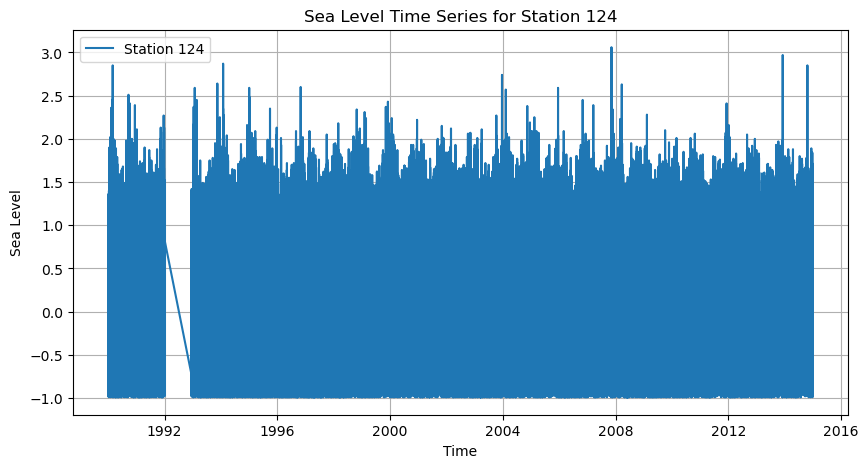

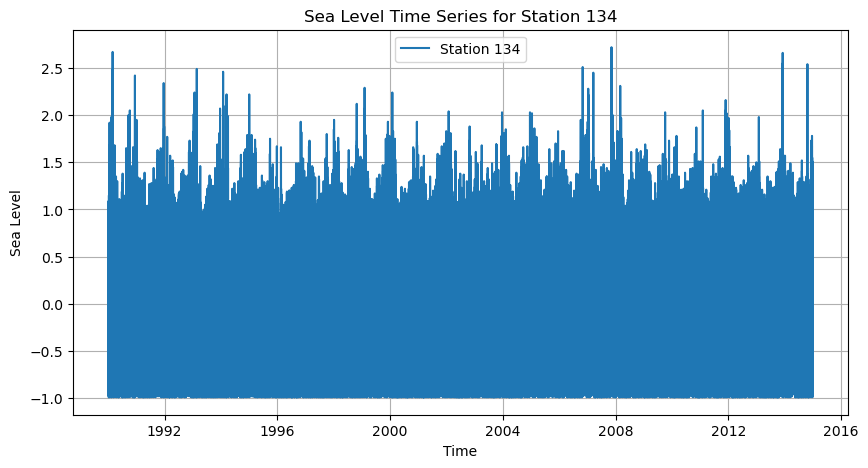

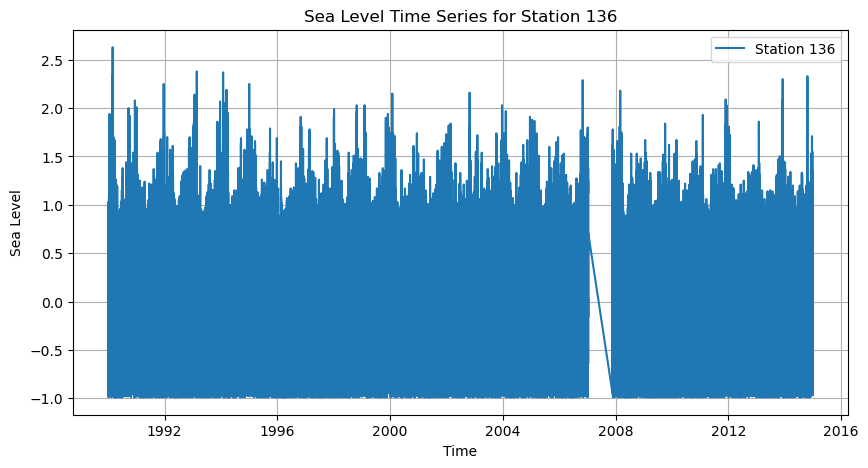

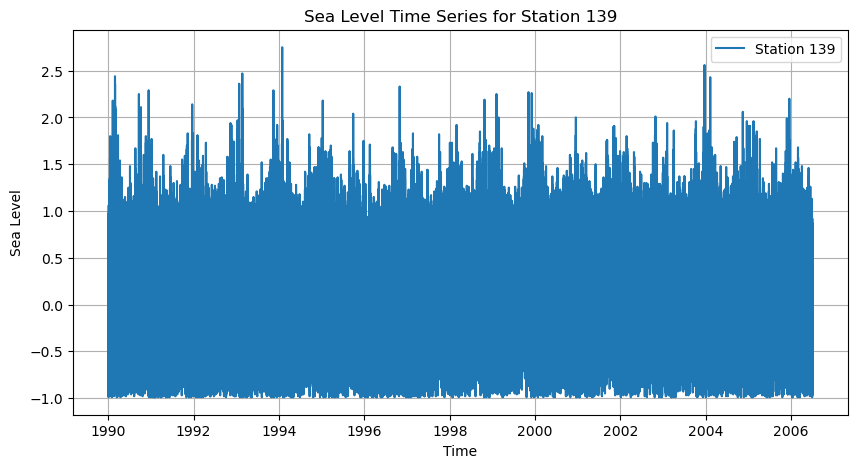

In [297]:
import matplotlib.pyplot as plt

# Iterate through the list of DataFrames
for df in trial:
    # Check if the DataFrame is not empty
    if not df.empty:
        # Extract the station number from the DataFrame columns
        station_number = int(df.columns[df.columns.str.startswith('q_sea_level_')][0].split('_')[-1])
        
        # Select the 'time' column and another column of interest (e.g., 'q_sea_level')
        time_series = df[['time', f'q_sea_level_{station_number}']]
        
        # Plot the time series
        plt.figure(figsize=(10, 5))
        plt.plot(time_series['time'], time_series[f'q_sea_level_{station_number}'], label=f'Station {station_number}')
        plt.xlabel('Time')
        plt.ylabel('Sea Level')
        plt.title(f'Sea Level Time Series for Station {station_number}')
        plt.legend()
        plt.grid(True)
        plt.show()


In [329]:
trial2 = []
for df in trial:
    trial2.append(df.reset_index())

In [330]:
# Concatenate all DataFrames in the list along the columns axis using 'time' as the key
merged_result = pd.concat(trial2, axis=1, join='outer', keys=[df.index.name for df in trial])

In [335]:
import pandas as pd

# Set time index for each DataFrame
for df in trial2:
    df.set_index('time', inplace=True)

# Concatenate all DataFrames along the columns axis
merged_result = pd.concat(trial, axis=1, join='outer')

# Reset index if needed
merged_result.reset_index(inplace=True)


/var/folders/2b/rpgq1g5d5qz2nhbpj5s4jnrc0000gq/T/ipykernel_19172/586034778.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_result.reset_index(inplace=True)


In [337]:
merged_result.resample('6H').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [314]:
hoi = merged_result.resample('6H').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [299]:
# Concatenate all DataFrames in the list along the columns axis using 'time' as the key
merged_result = pd.concat(trial, axis=1, join='outer')

In [306]:
hoi.time

,time,time,time,time,time,time,time,time,time,time,...,time,time,time,time,time,time,time,time,time,time
0,1996-03-19 03:00:00,NaT,NaT,NaT,1990-01-01 00:00:00,1990-01-01 00:00:00,1990-01-01 00:00:00,1990-01-01 00:00:00,NaT,1990-01-01 00:00:00,...,1990-01-01 00:00:00,NaT,1990-01-01 00:00:00,NaT,NaT,NaT,1990-01-01 00:00:00,NaT,1990-01-01 00:00:00,1990-01-01 00:00:00
1,1996-03-19 04:00:00,NaT,NaT,NaT,1990-01-01 01:00:00,1990-01-01 01:00:00,1990-01-01 01:00:00,1990-01-01 01:00:00,NaT,1990-01-01 01:00:00,...,1990-01-01 01:00:00,NaT,1990-01-01 01:00:00,NaT,NaT,NaT,1990-01-01 01:00:00,NaT,1990-01-01 01:00:00,1990-01-01 01:00:00
2,1996-03-19 05:00:00,NaT,NaT,NaT,1990-01-01 02:00:00,1990-01-01 02:00:00,1990-01-01 02:00:00,1990-01-01 02:00:00,NaT,1990-01-01 02:00:00,...,1990-01-01 02:00:00,NaT,1990-01-01 02:00:00,NaT,NaT,NaT,1990-01-01 02:00:00,NaT,1990-01-01 02:00:00,1990-01-01 02:00:00
3,1996-03-19 06:00:00,NaT,NaT,NaT,1990-01-01 03:00:00,1990-01-01 03:00:00,1990-01-01 03:00:00,1990-01-01 03:00:00,NaT,1990-01-01 03:00:00,...,1990-01-01 03:00:00,NaT,1990-01-01 03:00:00,NaT,NaT,NaT,1990-01-01 06:00:00,NaT,1990-01-01 05:00:00,1990-01-01 03:00:00
4,1996-03-19 07:00:00,NaT,NaT,NaT,1990-01-01 06:00:00,1990-01-01 04:00:00,1990-01-01 04:00:00,1990-01-01 04:00:00,NaT,1990-01-01 04:00:00,...,1990-01-01 04:00:00,NaT,1990-01-01 04:00:00,NaT,NaT,NaT,1990-01-01 07:00:00,NaT,1990-01-01 06:00:00,1990-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217258,NaT,NaT,NaT,NaT,NaT,2014-12-30 20:00:00,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
217259,NaT,NaT,NaT,NaT,NaT,2014-12-30 21:00:00,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
217260,NaT,NaT,NaT,NaT,NaT,2014-12-30 22:00:00,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
217261,NaT,NaT,NaT,NaT,NaT,2014-12-30 23:00:00,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [302]:
merged_result_6h = hoi.set_index("time")

ValueError: Index data must be 1-dimensional

In [301]:
hoi = merged_result

In [288]:
merged_result.reset_index()

Index(['index', 'u10_48', 'v10_48', 'sst_48', 'sp_48', 'time',
       'q_sea_level_48', 'station_48', 'u10', 'v10',
       ...
       'time', 'q_sea_level_136', 'station_136', 'u10_139', 'v10_139',
       'sst_139', 'sp_139', 'time', 'q_sea_level_139', 'station_139'],
      dtype='object', length=379)